In [11]:
import pandas as pd
import gdown  # to download data from google drive
import gzip   # to decompress downloaded data
import shutil
from scipy import stats
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from xgboost import XGBClassifier, cv, DMatrix
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [12]:
def download_data(folder_id):
    '''
    Downloads all content in a given google drive folder.

    Args:
    folder_id (str): google drive folder id which the content is to be downloaded from.
    '''
    print("downloading")
    url = f"https://drive.google.com/drive/folders/{folder_id}"
    # gdown URL formate
    gdown.download_folder(url=url, output="./downloaded_folder", quiet=False, use_cookies=False)

In [13]:
def decompress_gz(file_path, output_file_name):
    '''
    Decompresses given gzip file.

    Args:
    file_path (str): path of gzip file to be decompressed.
    output_file_name (str): name to be save of file after decompression.
    '''
    print("decompressing")
    with gzip.open(file_path, 'rb') as f_in:
        with open(output_file_name, 'wb') as f_out:
            shutil.copyfileobj(f_in, f_out)

In [14]:
def raw_data_downloading(file_path, downloaded_directory, decompressed_file_name):
    '''
    Downloads raw dataset.

    Args:
    file_path (str): path of dataset gzip file on google drive.
    downloaded_directory (str): path of dataset gzip file after download.
    decompressed_file_name (str): name to be save of file after decompression.
    '''
    download_data(file_path)
    decompress_gz(downloaded_directory, decompressed_file_name)

In [15]:
raw_data_downloading("14ZG8utOf0Ry76w_T9rqrk5kdhhPIK84P", '/kaggle/working/downloaded_folder/accepted_2007_to_2018Q4.csv.gz', "accepted.csv")

downloading


Retrieving folder contents


Retrieving folder 1UGhBnl-1KamEMI_jeSrYZC6Zp7HtmTKf extras
Processing file 1S-aQezZ35nOVke49jPKCJu6bLnePD9P8 decision_tree.png
Processing file 1lLc7u5ghmcZowpJhr58MMWNVMywVj7wA Learning Curve Log_Reg.jpg
Processing file 1uj6RpBJ_AphY9647eOkCBPzrQvw9K4la Log_Reg Interpretability.jpg
Processing file 13NX762lSljrdO6XIinOrM7gdjS0pSuAB ROC curve Log_Reg.jpg
Processing file 1thyWynkaoLHijDDfSxD_SEWSbOMONvai accepted_2007_to_2018Q4.csv.gz
Processing file 1IsZAXfIfRwcn1S7gs1TV8vOO15bNmXmK df_cleaned.csv


Retrieving folder contents completed
Building directory structure
Building directory structure completed
Downloading...
From: https://drive.google.com/uc?id=1S-aQezZ35nOVke49jPKCJu6bLnePD9P8
To: /kaggle/working/downloaded_folder/extras/decision_tree.png
100%|██████████| 292k/292k [00:00<00:00, 94.5MB/s]
Downloading...
From: https://drive.google.com/uc?id=1lLc7u5ghmcZowpJhr58MMWNVMywVj7wA
To: /kaggle/working/downloaded_folder/extras/Learning Curve Log_Reg.jpg
100%|██████████| 54.3k/54.3k [00:00<00:00, 47.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=1uj6RpBJ_AphY9647eOkCBPzrQvw9K4la
To: /kaggle/working/downloaded_folder/extras/Log_Reg Interpretability.jpg
100%|██████████| 60.9k/60.9k [00:00<00:00, 45.5MB/s]
Downloading...
From: https://drive.google.com/uc?id=13NX762lSljrdO6XIinOrM7gdjS0pSuAB
To: /kaggle/working/downloaded_folder/extras/ROC curve Log_Reg.jpg
100%|██████████| 34.2k/34.2k [00:00<00:00, 34.8MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1t

decompressing


In [16]:
def reading_data_into_dataframe(file_name):
    '''
    Saves raw dataset as a dataframe.

    Args:
    file_path (str): Dataset directory.

    Returns:
    dataframe: created dataframe
    '''
    print("reading")
    accepted_df = pd.read_csv(file_name, low_memory=False)
    return accepted_df

In [17]:
df = reading_data_into_dataframe("accepted.csv")
df.head()

reading


/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,68341763,NaN,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,66310712,NaN,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,68476807,NaN,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260701 entries, 0 to 2260700
Data columns (total 151 columns):
 #    Column                                      Dtype  
---   ------                                      -----  
 0    id                                          object 
 1    member_id                                   float64
 2    loan_amnt                                   float64
 3    funded_amnt                                 float64
 4    funded_amnt_inv                             float64
 5    term                                        object 
 6    int_rate                                    float64
 7    installment                                 float64
 8    grade                                       object 
 9    sub_grade                                   object 
 10   emp_title                                   object 
 11   emp_length                                  object 
 12   home_ownership                              object 
 13   annual_inc

### Nulls

Due to large dataset size, df.info() doesn't print all nulls.

So, this code snippet is to print each column null count.

In [19]:
for col in df.columns.tolist():
    print(col, df[col].isna().sum())

id 0
member_id 2260701
loan_amnt 33
funded_amnt 33
funded_amnt_inv 33
term 33
int_rate 33
installment 33
grade 33
sub_grade 33
emp_title 167002
emp_length 146940
home_ownership 33
annual_inc 37
verification_status 33
issue_d 33
loan_status 33
pymnt_plan 33
url 33
desc 2134636
purpose 33
title 23359
zip_code 34
addr_state 33
dti 1744
delinq_2yrs 62
earliest_cr_line 62
fico_range_low 33
fico_range_high 33
inq_last_6mths 63
mths_since_last_delinq 1158535
mths_since_last_record 1901545
open_acc 62
pub_rec 62
revol_bal 33
revol_util 1835
total_acc 62
initial_list_status 33
out_prncp 33
out_prncp_inv 33
total_pymnt 33
total_pymnt_inv 33
total_rec_prncp 33
total_rec_int 33
total_rec_late_fee 33
recoveries 33
collection_recovery_fee 33
last_pymnt_d 2460
last_pymnt_amnt 33
next_pymnt_d 1345343
last_credit_pull_d 105
last_fico_range_high 33
last_fico_range_low 33
collections_12_mths_ex_med 178
mths_since_last_major_derog 1679926
policy_code 33
application_type 33
annual_inc_joint 2139991
dti_joi

Printing columns with >= 20% null values

In [20]:
number_of_entries = 2260701
for col in df.columns.tolist():
    tot_col_nulls = df[col].isna().sum()
    if tot_col_nulls >= (0.2 * number_of_entries):
        print(col, tot_col_nulls, tot_col_nulls/number_of_entries)

member_id 2260701 1.0
desc 2134636 0.9442363231581709
mths_since_last_delinq 1158535 0.5124671506758302
mths_since_last_record 1901545 0.8411306935326698
next_pymnt_d 1345343 0.595099926969555
mths_since_last_major_derog 1679926 0.7430995960987322
annual_inc_joint 2139991 0.9466050574578416
dti_joint 2139995 0.9466068268205304
verification_status_joint 2144971 0.9488079140054346
open_acc_6m 866163 0.3831391236612007
open_act_il 866162 0.3831386813205285
open_il_12m 866162 0.3831386813205285
open_il_24m 866162 0.3831386813205285
mths_since_rcnt_il 909957 0.40251099105985266
total_bal_il 866162 0.3831386813205285
il_util 1068883 0.47281042473109003
open_rv_12m 866162 0.3831386813205285
open_rv_24m 866162 0.3831386813205285
max_bal_bc 866162 0.3831386813205285
all_util 866381 0.3832355539277419
inq_fi 866162 0.3831386813205285
total_cu_tl 866163 0.3831391236612007
inq_last_12m 866163 0.3831391236612007
mths_since_recent_bc_dlq 1741000 0.7701151103131285
mths_since_recent_revol_delinq 1520

Only "mths_since_last_delinq" and "all_util" columns are of high importance, every other column can be dropped.

In [21]:
number_of_entries = 2260701
for col in df.columns.tolist():
    if col == "mths_since_last_delinq" or col == "all_util":
        continue
    tot_col_nulls = df[col].isna().sum()
    if tot_col_nulls >= (0.2 * number_of_entries):
        df.drop(col, axis=1, inplace=True)

Some nulls in "mths_since_last_delinq" column mean "0", so it is corrected using "delinq_amnt" column. When "delinq_amnt" has a value of "0", then "mths_since_last_delinq_index" is set to "0".

In [22]:
df["mths_since_last_delinq"].isna().sum()

1158535

In [23]:
delinq_amnt_index = 62
mths_since_last_delinq_index = 28
for i in range (df.shape[0]):
    if df.iat[i, delinq_amnt_index] == 0 and df.iat[i, mths_since_last_delinq_index]:
        df.iat[i, mths_since_last_delinq_index] = 0

In [24]:
df["mths_since_last_delinq"].isna().sum()

249

In [25]:
for col in df.columns.tolist():
    print(col, df[col].isna().sum())

id 0
loan_amnt 33
funded_amnt 33
funded_amnt_inv 33
term 33
int_rate 33
installment 33
grade 33
sub_grade 33
emp_title 167002
emp_length 146940
home_ownership 33
annual_inc 37
verification_status 33
issue_d 33
loan_status 33
pymnt_plan 33
url 33
purpose 33
title 23359
zip_code 34
addr_state 33
dti 1744
delinq_2yrs 62
earliest_cr_line 62
fico_range_low 33
fico_range_high 33
inq_last_6mths 63
mths_since_last_delinq 249
open_acc 62
pub_rec 62
revol_bal 33
revol_util 1835
total_acc 62
initial_list_status 33
out_prncp 33
out_prncp_inv 33
total_pymnt 33
total_pymnt_inv 33
total_rec_prncp 33
total_rec_int 33
total_rec_late_fee 33
recoveries 33
collection_recovery_fee 33
last_pymnt_d 2460
last_pymnt_amnt 33
last_credit_pull_d 105
last_fico_range_high 33
last_fico_range_low 33
collections_12_mths_ex_med 178
policy_code 33
application_type 33
acc_now_delinq 62
tot_coll_amt 70309
tot_cur_bal 70309
all_util 866381
total_rev_hi_lim 70309
acc_open_past_24mths 50063
avg_cur_bal 70379
bc_open_to_buy 7

Since dataset has more than 2 million rows, all remaining rows with null values are dropped.

In [26]:
for col in df.columns.tolist():
    df = df[df[col].notna()]

In [27]:
df.shape

(1026715, 95)

In [28]:
flag = False
for col in df.columns.tolist():
    tot_col_nulls = df[col].isna().sum()
    if tot_col_nulls != 0:
        print(col, tot_col_nulls)
        flag = True
print(flag)

False


Reading dataset description, the following columns were found to be unimportant, so they're getting dropped.

In [29]:
useless_columns = ["acceptD", "application_type", "creditPullD", "desc",
                   "emp_title", "expD", "id", "listD", "mthsSinceMostRecentInq",
                   "reviewStatusD", "title", "url", "zip_code", "sec_app_inq_last_6mths"]
for col in useless_columns:
    if col in df.columns.tolist():
        df.drop(col, axis=1, inplace=True)

No more nulls in dataset.

### Duplicates

In [30]:
df.duplicated().value_counts()

False    1026715
Name: count, dtype: int64

No duplicates found

### Outliers

Outliers visualization

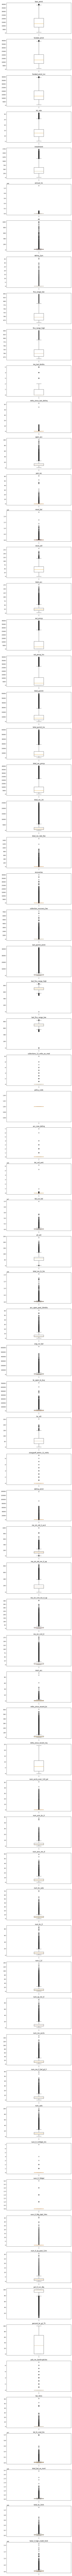

In [31]:
num_cols = [col for col in df.columns if df[col].dtype != 'O' and col != "loan_status"]

fig, axes = plt.subplots(nrows=len(num_cols), ncols=1, figsize=(8, 4 * len(num_cols)))

for ax, col in zip(axes, num_cols):
    ax.boxplot(df[col])
    ax.set_title(col)

plt.tight_layout()
plt.show()

Using z-score to drop outliers; most columns have outliers.

In [32]:
# Select numeric columns (excluding target column)
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
numeric_cols = [col for col in numeric_cols if col != 'loan_status']

# Compute z-scores
z_scores = np.abs(stats.zscore(df[numeric_cols]))

# Define threshold
threshold_z = 3

# Find rows with any z-score > threshold
outlier_rows = (z_scores > threshold_z).any(axis=1)

# Remove those rows
df = df[~outlier_rows]

# Optional: reset index
df.reset_index(drop=True, inplace=True)

print("Cleaned DataFrame Shape:", df.shape)

/tmp/ipykernel_31/3938221852.py:6: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  z_scores = np.abs(stats.zscore(df[numeric_cols]))
/tmp/ipykernel_31/3938221852.py:12: RuntimeWarning: invalid value encountered in greater
  outlier_rows = (z_scores > threshold_z).any(axis=1)


Cleaned DataFrame Shape: (641877, 89)


### Target column

In [33]:
df["loan_status"].value_counts()

loan_status
Current               398719
Fully Paid            194271
Charged Off            36265
Late (31-120 days)      7953
In Grace Period         3130
Late (16-30 days)       1526
Default                   13
Name: count, dtype: int64

Since our problem's type is binary classification, the loan_status (target) column will be encoded as such:
* Fully Paid, Current, In Grace Period, Late (16-30 days) -> 1
* Late (31-120 days), Default, Charged Off  -> 0

In [34]:
df['loan_status'] = df['loan_status'].replace('Current', "1")
df['loan_status'] = df['loan_status'].replace('Fully Paid', "1")
df['loan_status'] = df['loan_status'].replace('Charged Off', "0")
df['loan_status'] = df['loan_status'].replace('Late (31-120 days)', "0")
df['loan_status'] = df['loan_status'].replace('In Grace Period', "1")
df['loan_status'] = df['loan_status'].replace('Late (16-30 days)', "1")
df['loan_status'] = df['loan_status'].replace('Default', "0")

In [35]:
df["loan_status"].value_counts()

loan_status
1    597646
0     44231
Name: count, dtype: int64

There's more "1" values than "0", so a random sample of size equivalent to "0" count will be taken.

In [36]:
subset_good = df[df['loan_status'] == "1"].sample(n=100329, random_state=737) #randomly selecting as many good credit as there are bad available
subset_bad = df[df['loan_status'] == "0"] #saving bad credit for concatenation
df = pd.concat([subset_good, subset_bad])
df = df.sample(frac = 1)
df.reset_index(inplace=True)
df["loan_status"]

0         0
1         0
2         1
3         0
4         0
         ..
144555    1
144556    0
144557    0
144558    1
144559    1
Name: loan_status, Length: 144560, dtype: object

### Standardization

In [37]:
df.head()

,index,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag
0,445569,5600.0,5600.0,5600.0,36 months,16.01,196.91,C,C5,10+ years,...,11.1,0.0,0.0,142197.0,68373.0,86600.0,49297.0,N,Cash,N
1,602542,3600.0,3600.0,3600.0,36 months,16.99,128.34,D,D1,5 years,...,0.0,0.0,0.0,72979.0,43436.0,12000.0,54079.0,N,Cash,Y
2,547842,20000.0,20000.0,20000.0,36 months,16.02,703.34,C,C5,10+ years,...,66.7,0.0,1.0,36288.0,23370.0,11500.0,24788.0,N,Cash,N
3,151061,10000.0,10000.0,10000.0,36 months,8.39,315.17,B,B1,10+ years,...,50.0,0.0,0.0,243594.0,32998.0,11400.0,26094.0,N,Cash,N
4,541659,10000.0,10000.0,10000.0,36 months,22.91,386.63,E,E1,6 years,...,0.0,0.0,0.0,78565.0,44639.0,35300.0,42411.0,N,Cash,N


Each column will be standardized to enhance models' perforamnce; wide range of numeric columns & slight skewness.

In [38]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
for col in df.columns:
    if df[col].dtype != 'O' and col != "loan_status":
        col_array = np.array(df[col])
        col_array = col_array.reshape(-1, 1)
        scaler.fit(col_array)
        df[col] = scaler.transform(col_array)
df

,index,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag
0,0.648158,-0.979764,-0.979750,-0.979381,36 months,0.592343,-0.880900,C,C5,10+ years,...,-0.766767,-0.40777,-0.124628,-0.071804,0.658816,4.087981,0.199235,N,Cash,N
1,1.486330,-1.230333,-1.230320,-1.229989,36 months,0.800086,-1.174785,D,D1,5 years,...,-1.079353,-0.40777,-0.124628,-0.588931,-0.081813,-0.504784,0.340881,N,Cash,Y
2,1.194254,0.824338,0.824355,0.825001,36 months,0.594463,1.289620,C,C5,10+ years,...,0.798977,-0.40777,8.023851,-0.863049,-0.677773,-0.535567,-0.526735,N,Cash,N
3,-0.924393,-0.428511,-0.428496,-0.428042,36 months,-1.022962,-0.374047,B,B1,10+ years,...,0.328691,-0.40777,-0.124628,0.685733,-0.391822,-0.541723,-0.488050,N,Cash,N
4,1.161240,-0.428511,-0.428496,-0.428042,36 months,2.055021,-0.067775,E,E1,6 years,...,-1.079353,-0.40777,-0.124628,-0.547198,-0.046084,0.929685,-0.004732,N,Cash,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144555,-0.836765,0.323198,0.323215,0.323784,36 months,-1.273101,0.399177,A,A3,10+ years,...,-1.079353,-0.40777,-0.124628,1.689880,-0.815819,3.386137,-1.260969,N,Cash,N
144556,0.340956,-0.679080,-0.679066,-0.678651,36 months,1.315203,-0.460708,D,D3,10+ years,...,1.736735,-0.40777,-0.124628,-0.581467,0.757806,-0.732575,0.610398,N,Cash,N
144557,-0.253501,-0.478624,-0.478610,-0.478164,36 months,-0.734666,-0.402034,B,B3,6 years,...,-1.079353,-0.40777,-0.124628,-0.299056,-1.019264,-0.812610,-1.260969,N,Cash,N
144558,-0.700659,-0.303226,-0.303211,-0.302738,36 months,-1.506282,-0.288242,A,A1,3 years,...,-1.079353,-0.40777,-0.124628,-0.545173,-0.157043,0.689581,0.090794,N,DirectPay,N


### Label encoding

In [39]:
df.head()

,index,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag
0,0.648158,-0.979764,-0.979750,-0.979381,36 months,0.592343,-0.880900,C,C5,10+ years,...,-0.766767,-0.40777,-0.124628,-0.071804,0.658816,4.087981,0.199235,N,Cash,N
1,1.486330,-1.230333,-1.230320,-1.229989,36 months,0.800086,-1.174785,D,D1,5 years,...,-1.079353,-0.40777,-0.124628,-0.588931,-0.081813,-0.504784,0.340881,N,Cash,Y
2,1.194254,0.824338,0.824355,0.825001,36 months,0.594463,1.289620,C,C5,10+ years,...,0.798977,-0.40777,8.023851,-0.863049,-0.677773,-0.535567,-0.526735,N,Cash,N
3,-0.924393,-0.428511,-0.428496,-0.428042,36 months,-1.022962,-0.374047,B,B1,10+ years,...,0.328691,-0.40777,-0.124628,0.685733,-0.391822,-0.541723,-0.488050,N,Cash,N
4,1.161240,-0.428511,-0.428496,-0.428042,36 months,2.055021,-0.067775,E,E1,6 years,...,-1.079353,-0.40777,-0.124628,-0.547198,-0.046084,0.929685,-0.004732,N,Cash,N


Encoding categorical columns; to be input into models.

In [40]:
le = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'O':
        le.fit(df[col])
        df[col] = le.transform(df[col])

In [41]:
df.head()

,index,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag
0,0.648158,-0.979764,-0.979750,-0.979381,0,0.592343,-0.880900,2,14,1,...,-0.766767,-0.40777,-0.124628,-0.071804,0.658816,4.087981,0.199235,0,0,0
1,1.486330,-1.230333,-1.230320,-1.229989,0,0.800086,-1.174785,3,15,5,...,-1.079353,-0.40777,-0.124628,-0.588931,-0.081813,-0.504784,0.340881,0,0,1
2,1.194254,0.824338,0.824355,0.825001,0,0.594463,1.289620,2,14,1,...,0.798977,-0.40777,8.023851,-0.863049,-0.677773,-0.535567,-0.526735,0,0,0
3,-0.924393,-0.428511,-0.428496,-0.428042,0,-1.022962,-0.374047,1,5,1,...,0.328691,-0.40777,-0.124628,0.685733,-0.391822,-0.541723,-0.488050,0,0,0
4,1.161240,-0.428511,-0.428496,-0.428042,0,2.055021,-0.067775,4,20,6,...,-1.079353,-0.40777,-0.124628,-0.547198,-0.046084,0.929685,-0.004732,0,0,0


### Feature Selection

An XGBoost model is trained on the dataset. Then the top 20 influential features are shown ordered in a barplot.

These 20 features will be used as input to all models.

In [42]:
df.drop("index", axis=1, inplace=True)

In [43]:
X = df.drop("loan_status", axis=1)
y = df["loan_status"]
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=737)

In [44]:
# Convert to DMatrix (optimized XGBoost data structure)
dtrain = xgb.DMatrix(x_train, label=y_train)
dtest = xgb.DMatrix(x_test, label=y_test)

# Parameters aligned with XGBoost's theoretical improvements
params = {
    'objective': 'binary:logistic',  # Logistic regression for binary classification
    'eval_metric': 'auc',           # AUC for early stopping
    'tree_method': 'hist',          # Histogram-based approximation (Chen & Guestrin 2016)
    'learning_rate': 0.1,           # Shrinkage (eta) to prevent overfitting
    'max_depth': 6,                # Default depth (control complexity)
    'subsample': 0.8,               # Stochastic gradient boosting (Friedman)
    'colsample_bytree': 0.8,        # Feature subsampling
    'gamma': 0.1,                   # Minimum loss reduction to split (regularization)
    'reg_alpha': 0.1,               # L1 regularization (Chen & Guestrin addition)
    'reg_lambda': 1.0,              # L2 regularization
    'seed': 42,
    'n_jobs': -1                    # Parallel processing
}

# Early stopping (prevents overfitting)
num_rounds = 500
watchlist = [(dtrain, 'train'), (dtest, 'eval')]
model = xgb.train(params, dtrain, num_boost_round=num_rounds, evals=watchlist,
                  early_stopping_rounds=20, verbose_eval=10)

[0]	train-auc:0.98878	eval-auc:0.98918
[10]	train-auc:0.99742	eval-auc:0.99773
[20]	train-auc:0.99820	eval-auc:0.99842
[30]	train-auc:0.99874	eval-auc:0.99871
[40]	train-auc:0.99895	eval-auc:0.99895
[50]	train-auc:0.99909	eval-auc:0.99908
[60]	train-auc:0.99917	eval-auc:0.99916
[70]	train-auc:0.99931	eval-auc:0.99921
[80]	train-auc:0.99940	eval-auc:0.99924
[90]	train-auc:0.99949	eval-auc:0.99926
[100]	train-auc:0.99957	eval-auc:0.99928
[110]	train-auc:0.99965	eval-auc:0.99929
[120]	train-auc:0.99970	eval-auc:0.99929
[130]	train-auc:0.99975	eval-auc:0.99928
[140]	train-auc:0.99980	eval-auc:0.99929
[150]	train-auc:0.99983	eval-auc:0.99928
[155]	train-auc:0.99985	eval-auc:0.99929


<Figure size 1200x600 with 0 Axes>

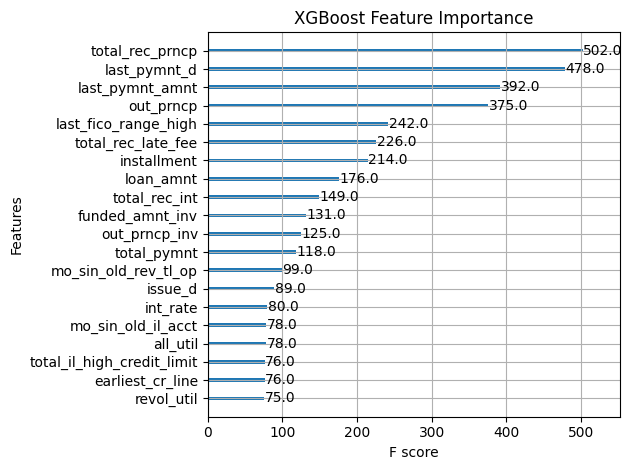

In [45]:
# Make predictions
y_pred_proba = model.predict(dtest)
y_pred = (y_pred_proba > 0.5).astype(int)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)

# Plot feature importance
plt.figure(figsize=(12, 6))
xgb.plot_importance(model, max_num_features=20)
plt.title('XGBoost Feature Importance')
plt.tight_layout()
plt.show()

In [46]:
df = df[["last_pymnt_d", "total_rec_prncp", "last_pymnt_amnt", "out_prncp",
         "total_rec_late_fee", "last_fico_range_high", "installment", "loan_amnt",
         "total_rec_int", "out_prncp_inv", "total_pymnt", "funded_amnt_inv",
         "recoveries", "debt_settlement_flag", "hardship_flag", "mo_sin_old_rev_tl_op",
         "revol_util", "dti", "all_util", "annual_inc", "loan_status"]]

### Logistic Regression Assumptions

#### 1. Appropriate Outcome Type

In [47]:
# Count unique number of outcomes in dependent variable
print("Unique values in target variable:", y.nunique())
print("Value counts:\n", y.value_counts())

Unique values in target variable: 2
Value counts:
 loan_status
1    100329
0     44231
Name: count, dtype: int64


#### 2. Linearity of Independent Variables and Log Odds

In [48]:
import statsmodels.api as sm
from statsmodels.genmod.families import Binomial

# Define all_continuous_vars
# Get a list of numeric features (excluding 'loan_status')
all_continuous_vars = X.select_dtypes(include=['number']).columns.tolist()

# Initialize results storage
bt_pvals = {}
passing_features = []
violating_features = {}

# Loop through features one at a time
for var in all_continuous_vars:
    try:
        df_temp = X[[var]].copy()
        df_temp['loan_status'] = y

        # Keep only rows where feature > 0
        df_temp = df_temp[df_temp[var] > 0]
        if df_temp.shape[0] < 100:
            continue  # Skip small samples

        # Add interaction term (Box-Tidwell)
        df_temp[f'{var}:Log_{var}'] = df_temp[var].apply(lambda x: x * np.log(x))

        # Prepare X and y
        X_bt = df_temp[[var, f'{var}:Log_{var}']]
        X_bt = sm.add_constant(X_bt, prepend=False)  # Add intercept
        y_bt = df_temp['loan_status']

        # Fit GLM (logistic regression)
        logit_model = sm.GLM(y_bt, X_bt, family=Binomial())
        logit_results = logit_model.fit()

        # Store p-value of the interaction term
        pval = logit_results.pvalues.get(f'{var}:Log_{var}', np.nan)
        bt_pvals[var] = pval

        # Print full summary in one block
        print(f"\n{'=' * 80}")
        print(f"Box-Tidwell Test for Feature: {var}")
        print(f"{'=' * 80}")
        print(logit_results.summary().as_text())  # Key change: `.as_text()` ensures single block
        print(f"{'=' * 80}")
        print(f"Interaction Term P-value: {pval:.4f}")
        print(f"{'=' * 80}\n")

        # Classify based on p-value
        if pval < 0.05:
            passing_features.append(var)
        else:
            violating_features[var] = pval

    except Exception as e:
        bt_pvals[var] = f"Error: {str(e)}"
        print(f"❌ Error testing {var}: {str(e)}")


Box-Tidwell Test for Feature: loan_amnt
                 Generalized Linear Model Regression Results                  
Dep. Variable:            loan_status   No. Observations:                61804
Model:                            GLM   Df Residuals:                    61801
Model Family:                Binomial   Df Model:                            2
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -37792.
Date:                Thu, 17 Apr 2025   Deviance:                       75583.
Time:                        15:33:20   Pearson chi2:                 6.18e+04
No. Iterations:                     5   Pseudo R-squ. (CS):           0.001849
Covariance Type:            nonrobust                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------

/usr/local/lib/python3.11/dist-packages/statsmodels/genmod/generalized_linear_model.py:1342: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/usr/local/lib/python3.11/dist-packages/statsmodels/genmod/generalized_linear_model.py:1342: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/usr/local/lib/python3.11/dist-packages/statsmodels/genmod/generalized_linear_model.py:1342: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/usr/local/lib/python3.11/dist-packages/statsmodels/genmod/generalized_linear_model.py:1342: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)



Box-Tidwell Test for Feature: collection_recovery_fee
                 Generalized Linear Model Regression Results                  
Dep. Variable:            loan_status   No. Observations:                17267
Model:                            GLM   Df Residuals:                    17264
Model Family:                Binomial   Df Model:                            2
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -2.4940e-09
Date:                Thu, 17 Apr 2025   Deviance:                   4.9919e-09
Time:                        15:33:30   Pearson chi2:                 2.49e-09
No. Iterations:                    28   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
                                                          coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------

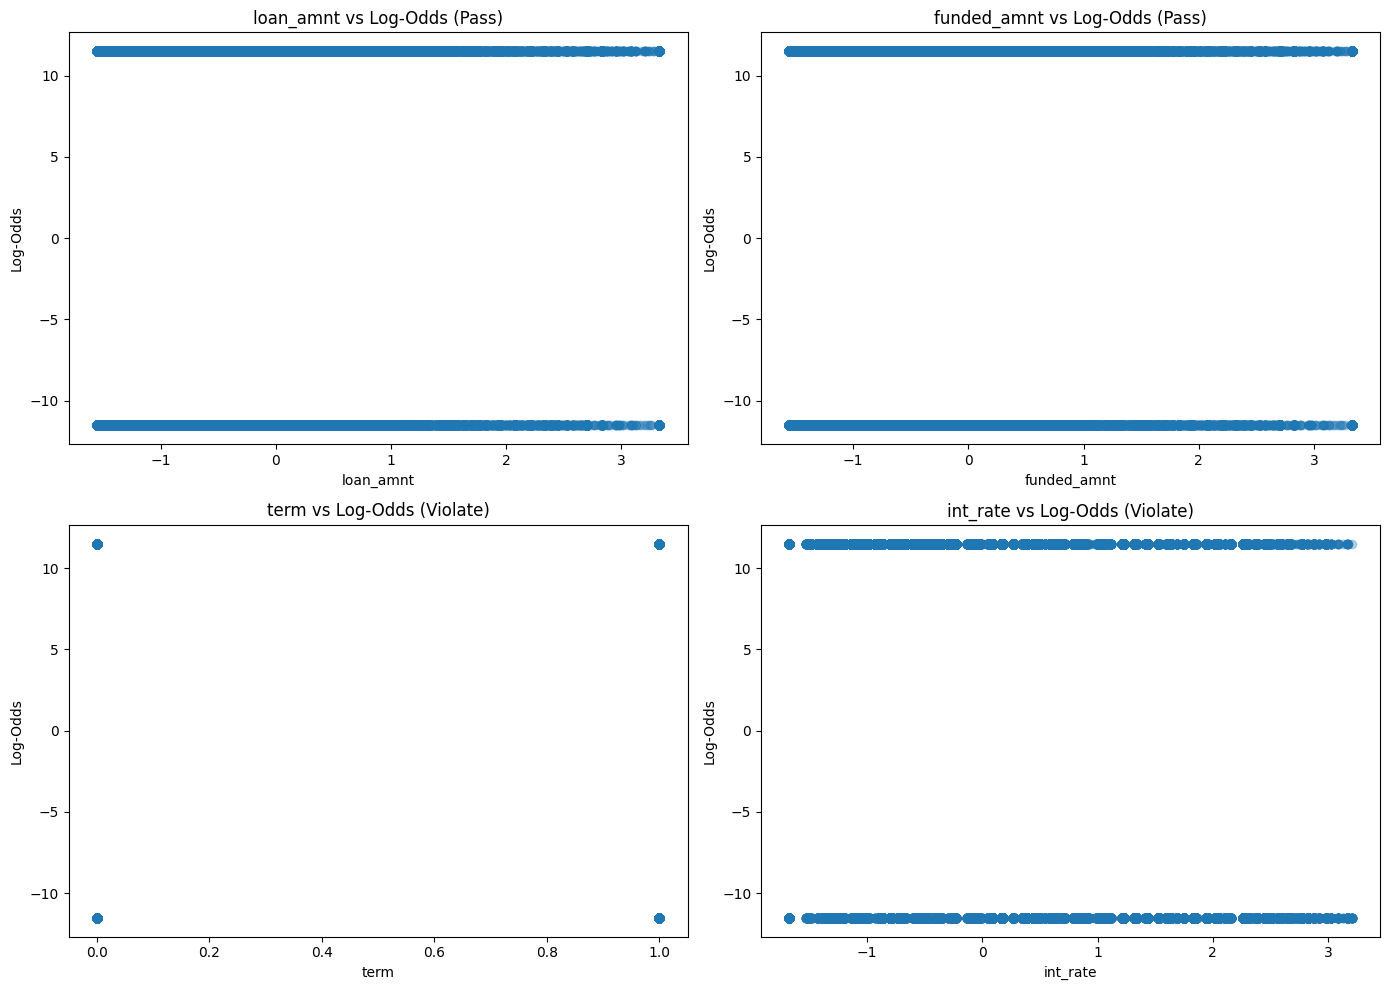

In [49]:
# Step 1: Fit logistic regression
logit_results = sm.GLM(y, X, family=sm.families.Binomial()).fit()
predicted = logit_results.predict(X)

# Step 2: Avoid division by zero by clipping predictions
predicted = np.clip(predicted, 1e-5, 1 - 1e-5)
log_odds = np.log(predicted / (1 - predicted))

# Step 3: Choose 2 passing and 2 violating features
valid_vars = passing_features[:2]
violating_vars = list(violating_features.keys())[:2]
selected_vars = valid_vars + violating_vars

# Step 4: Plot with cleaned data
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
axs = axs.flatten()

for i, var in enumerate(selected_vars):
    try:
        feature_values = X[var]
        df_plot = pd.DataFrame({var: feature_values, 'log_odds': log_odds})
        df_plot.replace([np.inf, -np.inf], np.nan, inplace=True)
        df_plot.dropna(inplace=True)

        axs[i].scatter(df_plot[var], df_plot['log_odds'], alpha=0.3)
        axs[i].set_title(f"{var} vs Log-Odds ({'Pass' if var in valid_vars else 'Violate'})")
        axs[i].set_xlabel(var)
        axs[i].set_ylabel("Log-Odds")
    except Exception as e:
        axs[i].text(0.5, 0.5, f"Error plotting {var}:\n{str(e)}",
                    transform=axs[i].transAxes, ha='center', va='center')
        axs[i].set_axis_off()

plt.tight_layout()
plt.show()

In [50]:
# Final report
print("\nFeatures that pass linearity assumption (p < 0.05):")
for v in passing_features:
    print(f"  - {v} (p = {bt_pvals[v]:.4f})")

print("\nFeatures that violate linearity (p ≥ 0.05):")
for v, p in violating_features.items():
    print(f"  - {v} (p = {p:.4f})")


Features that pass linearity assumption (p < 0.05):
  - loan_amnt (p = 0.0000)
  - funded_amnt (p = 0.0000)
  - funded_amnt_inv (p = 0.0000)
  - installment (p = 0.0071)
  - sub_grade (p = 0.0000)
  - home_ownership (p = 0.0000)
  - annual_inc (p = 0.0000)
  - issue_d (p = 0.0000)
  - purpose (p = 0.0000)
  - dti (p = 0.0000)
  - fico_range_low (p = 0.0000)
  - fico_range_high (p = 0.0000)
  - revol_bal (p = 0.0363)
  - out_prncp (p = 0.0130)
  - out_prncp_inv (p = 0.0125)
  - total_rec_prncp (p = 0.0007)
  - last_pymnt_d (p = 0.0000)
  - last_pymnt_amnt (p = 0.0000)
  - last_credit_pull_d (p = 0.0000)
  - last_fico_range_high (p = 0.0000)
  - last_fico_range_low (p = 0.0000)
  - tot_cur_bal (p = 0.0078)
  - all_util (p = 0.0000)
  - acc_open_past_24mths (p = 0.0003)
  - avg_cur_bal (p = 0.0120)
  - bc_util (p = 0.0028)
  - mo_sin_old_il_acct (p = 0.0000)
  - mo_sin_rcnt_rev_tl_op (p = 0.0018)
  - mo_sin_rcnt_tl (p = 0.0000)
  - mths_since_recent_bc (p = 0.0029)
  - mths_since_recent_

#### 3. No Strongly Influential Outliers  have been checked in previous EDA

#### 4. Absence of Multicollinearity  have been checked in previous EDA

#### 5. Independence of Observations

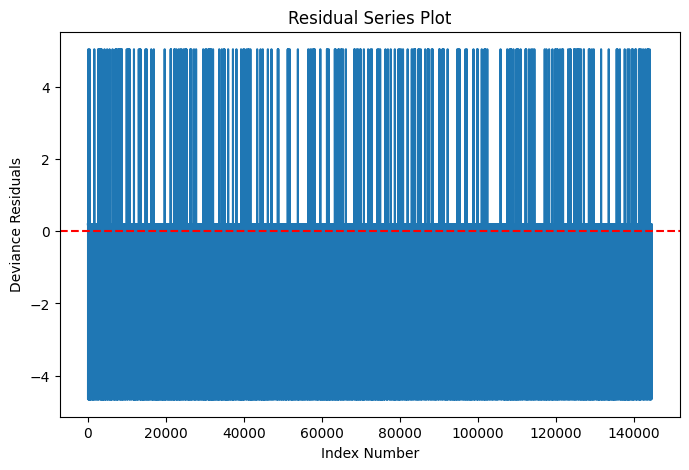

In [53]:
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.genmod.generalized_linear_model import GLM
from statsmodels.genmod import families

# Refit the logistic regression model using GLM to get residuals
X_const = sm.add_constant(X)
logit_results = GLM(y, X_const, family=families.Binomial()).fit()

# Setup plot
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(111, title="Residual Series Plot",
                     xlabel="Index Number",
                     ylabel="Deviance Residuals")

# Generate residual series plot using standardized deviance residuals
ax.plot(X.index.tolist(), stats.zscore(logit_results.resid_deviance))

# Draw horizontal line at y = 0
plt.axhline(y=0, linestyle="--", color='red')

plt.show()

* The residuals appear to be randomly scattered around the center line at 0.
* There is no visible trend, clustering, or autocorrelation.
* This indicates that the errors are likely independent, satisfying the assumption visually.

In [54]:
from statsmodels.stats.stattools import durbin_watson

# Calculate Durbin-Watson statistic
dw_stat = durbin_watson(logit_results.resid_deviance)
print(f"Durbin-Watson statistic: {dw_stat:.4f}")

Durbin-Watson statistic: 1.9275


* result is close to 2, it confirms independent residuals

#### 6. Sufficiently Large Sample Size

In [55]:
import statsmodels.api as sm
from statsmodels.genmod.generalized_linear_model import GLM
from statsmodels.genmod.families import Binomial


# Fit the logistic regression model
X_const = sm.add_constant(X)  # Add a constant for the intercept term
logit_model = GLM(y, X_const, family=Binomial()).fit()


# Calculate the number of observations and parameters
nobs = logit_model.nobs
k_vars = logit_model.df_model


# Check the sample size rule
print(f"Number of observations (nobs): {nobs}")
print(f"Number of predictor variables (k_vars): {k_vars}")

# Recommended rule of thumb: at least 10 observations per predictor variable
min_obs = k_vars * 10
print(f"Minimum observations recommended: {min_obs}")


if nobs >= min_obs:
    print("The sample size is sufficiently large for logistic regression.")
else:
    print("Warning: The sample size may be too small for reliable results.")
    print("Consider collecting more data or using a different method.")

Number of observations (nobs): 144560
Number of predictor variables (k_vars): 79
Minimum observations recommended: 790
The sample size is sufficiently large for logistic regression.
